In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c52cc90b85e4e595d49e394023150204


In [9]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c52cc90b85e4e595d49e394023150204&q=Boston


In [10]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [11]:
city_weather.status_code

200

In [12]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [13]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.06,"lat":42.36},"weather":[{"id":701,"main":"Mist","description":"mist","icon":"50d"},{"id":601,"main":"Snow","description":"snow","icon":"13d"}],"base":"stations","main":{"temp":30.65,"feels_like":16.9,"temp_min":28.99,"temp_max":32,"pressure":1014,"humidity":92},"visibility":1207,"wind":{"speed":17.22,"deg":330,"gust":26.4},"snow":{"1h":1.59},"clouds":{"all":90},"dt":1604081454,"sys":{"type":1,"id":3486,"country":"US","sunrise":1604056535,"sunset":1604094000},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [14]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'},
  {'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13d'}],
 'base': 'stations',
 'main': {'temp': 30.65,
  'feels_like': 16.9,
  'temp_min': 28.99,
  'temp_max': 32,
  'pressure': 1014,
  'humidity': 92},
 'visibility': 1207,
 'wind': {'speed': 17.22, 'deg': 330, 'gust': 26.4},
 'snow': {'1h': 1.59},
 'clouds': {'all': 90},
 'dt': 1604081454,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1604056535,
  'sunset': 1604094000},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [16]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50d'},
  {'id': 601, 'main': 'Snow', 'description': 'snow', 'icon': '13d'}],
 'base': 'stations',
 'main': {'temp': 30.65,
  'feels_like': 16.9,
  'temp_min': 28.99,
  'temp_max': 32,
  'pressure': 1014,
  'humidity': 92},
 'visibility': 1207,
 'wind': {'speed': 17.22, 'deg': 330, 'gust': 26.4},
 'snow': {'1h': 1.59},
 'clouds': {'all': 90},
 'dt': 1604081454,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1604056535,
  'sunset': 1604094000},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [17]:
# Get the JSON data.
boston_data = city_weather.json()

In [18]:
boston_data["sys"]

{'type': 1,
 'id': 3486,
 'country': 'US',
 'sunrise': 1604056535,
 'sunset': 1604094000}

In [19]:
boston_data["sys"]["country"]

'US'

In [20]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 32 92 90 17.22


In [21]:
boston_data["dt"]

1604081454

In [22]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2020, 10, 30, 18, 10, 54)

In [23]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2020-10-30 18:10:54'

In [24]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [26]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | arlington
Processing Record 2 of Set 1 | upernavik
Processing Record 3 of Set 1 | port lincoln
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | hasaki
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | mahebourg
Processing Record 11 of Set 1 | san patricio
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | waipawa
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | esperance
Processing Record 16 of Set 1 | mar del plata
Processing Record 17 of Set 1 | puri
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | kyshtovka
Processing Record 20 of Set 1 | norman wells
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | san quintin
Processing Record 23 of 

Processing Record 37 of Set 4 | saint-philippe
Processing Record 38 of Set 4 | souillac
Processing Record 39 of Set 4 | imbituba
Processing Record 40 of Set 4 | chabahar
Processing Record 41 of Set 4 | curup
Processing Record 42 of Set 4 | namatanai
Processing Record 43 of Set 4 | sorong
Processing Record 44 of Set 4 | mogwase
Processing Record 45 of Set 4 | kruisfontein
Processing Record 46 of Set 4 | xinan
Processing Record 47 of Set 4 | ponta do sol
Processing Record 48 of Set 4 | avarua
Processing Record 49 of Set 4 | boddam
Processing Record 50 of Set 4 | mayumba
Processing Record 1 of Set 5 | oda
Processing Record 2 of Set 5 | kuche
City not found. Skipping...
Processing Record 3 of Set 5 | faanui
Processing Record 4 of Set 5 | turukhansk
Processing Record 5 of Set 5 | viedma
Processing Record 6 of Set 5 | codrington
Processing Record 7 of Set 5 | dire dawa
Processing Record 8 of Set 5 | leningradskiy
Processing Record 9 of Set 5 | tefe
Processing Record 10 of Set 5 | phalodi
Pro

Processing Record 25 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 26 of Set 8 | kieta
Processing Record 27 of Set 8 | manassas
Processing Record 28 of Set 8 | dalbandin
Processing Record 29 of Set 8 | fort saint john
City not found. Skipping...
Processing Record 30 of Set 8 | milas
Processing Record 31 of Set 8 | dawlatabad
Processing Record 32 of Set 8 | warqla
City not found. Skipping...
Processing Record 33 of Set 8 | kijang
Processing Record 34 of Set 8 | tokur
Processing Record 35 of Set 8 | nyul
Processing Record 36 of Set 8 | la ronge
Processing Record 37 of Set 8 | giyani
Processing Record 38 of Set 8 | atyrau
Processing Record 39 of Set 8 | muhos
Processing Record 40 of Set 8 | upata
Processing Record 41 of Set 8 | staritsa
Processing Record 42 of Set 8 | narsaq
Processing Record 43 of Set 8 | kiruna
Processing Record 44 of Set 8 | ust-koksa
Processing Record 45 of Set 8 | vostok
Processing Record 46 of Set 8 | mahon
Processing Record 47 of Set 8 | araouan

Processing Record 10 of Set 12 | dovers
Processing Record 11 of Set 12 | asau
Processing Record 12 of Set 12 | emerald
Processing Record 13 of Set 12 | forbes
Processing Record 14 of Set 12 | solone
Processing Record 15 of Set 12 | saint-leu
Processing Record 16 of Set 12 | grand-santi
Processing Record 17 of Set 12 | severnyy
Processing Record 18 of Set 12 | mulege
Processing Record 19 of Set 12 | wolmaranstad
City not found. Skipping...
Processing Record 20 of Set 12 | peterhead
Processing Record 21 of Set 12 | okakarara
Processing Record 22 of Set 12 | brownsville
Processing Record 23 of Set 12 | nabire
Processing Record 24 of Set 12 | buraydah
Processing Record 25 of Set 12 | nanortalik
Processing Record 26 of Set 12 | taikang
Processing Record 27 of Set 12 | show low
Processing Record 28 of Set 12 | divnogorsk
Processing Record 29 of Set 12 | champerico
Processing Record 30 of Set 12 | hispania
Processing Record 31 of Set 12 | adrar
Processing Record 32 of Set 12 | oriximina
Proce

In [44]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arlington,32.74,-97.11,64.40,31,1,3.36,US,2020-10-30 18:16:08
1,Upernavik,72.79,-56.15,21.15,96,99,4.14,GL,2020-10-30 18:20:00
2,Port Lincoln,-34.73,135.87,56.34,84,93,11.56,AU,2020-10-30 18:20:01
3,Jamestown,42.10,-79.24,37.99,93,90,5.82,US,2020-10-30 18:16:31
4,Hermanus,-34.42,19.23,54.00,76,0,11.97,ZA,2020-10-30 18:20:01
5,Ushuaia,-54.80,-68.30,50.00,71,75,24.16,AR,2020-10-30 18:20:01
6,Hobart,-42.88,147.33,42.80,93,40,3.36,AU,2020-10-30 18:17:02
7,Hasaki,35.73,140.83,44.60,81,0,4.70,JP,2020-10-30 18:20:02
8,Rikitea,-23.12,-134.97,75.49,69,62,8.01,PF,2020-10-30 18:20:03
9,Mahebourg,-20.41,57.70,69.80,52,40,13.87,MU,2020-10-30 18:20:03


In [45]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [46]:
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Arlington,US,2020-10-30 18:16:08,32.74,-97.11,64.40,31,1,3.36
1,Upernavik,GL,2020-10-30 18:20:00,72.79,-56.15,21.15,96,99,4.14
2,Port Lincoln,AU,2020-10-30 18:20:01,-34.73,135.87,56.34,84,93,11.56
3,Jamestown,US,2020-10-30 18:16:31,42.10,-79.24,37.99,93,90,5.82
4,Hermanus,ZA,2020-10-30 18:20:01,-34.42,19.23,54.00,76,0,11.97
5,Ushuaia,AR,2020-10-30 18:20:01,-54.80,-68.30,50.00,71,75,24.16
6,Hobart,AU,2020-10-30 18:17:02,-42.88,147.33,42.80,93,40,3.36
7,Hasaki,JP,2020-10-30 18:20:02,35.73,140.83,44.60,81,0,4.70
8,Rikitea,PF,2020-10-30 18:20:03,-23.12,-134.97,75.49,69,62,8.01
9,Mahebourg,MU,2020-10-30 18:20:03,-20.41,57.70,69.80,52,40,13.87


In [47]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [48]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [49]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1604087895.259933

In [50]:
today=time.strftime("%x")
today

'10/30/20'

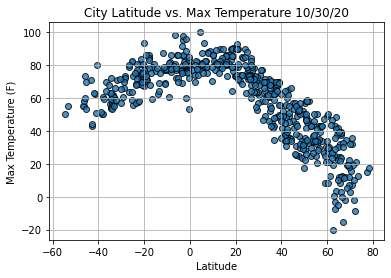

In [51]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

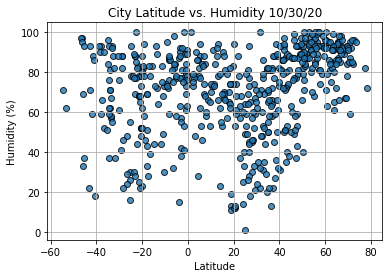

In [52]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

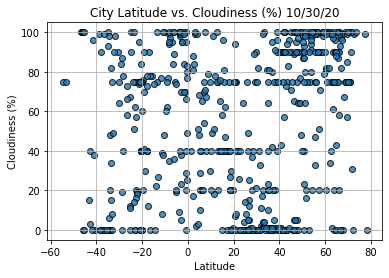

In [53]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

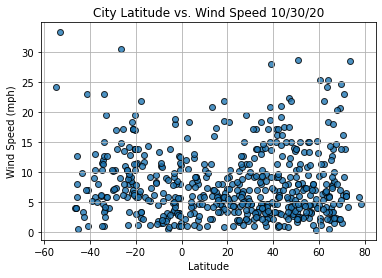

In [54]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [64]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [65]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [66]:
index13=city_data_df.loc[13]
index13

City                    Busselton
Country                        AU
Date          2020-10-30 18:20:05
Lat                        -33.65
Lng                        115.33
Max Temp                    62.01
Humidity                       57
Cloudiness                     15
Wind Speed                   3.74
Name: 13, dtype: object

In [67]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4      False
       ...  
546    False
547    False
548     True
549     True
550     True
Name: Lat, Length: 551, dtype: bool

In [68]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Arlington,US,2020-10-30 18:16:08,32.74,-97.11,64.40,31,1,3.36
1,Upernavik,GL,2020-10-30 18:20:00,72.79,-56.15,21.15,96,99,4.14
2,Port Lincoln,AU,2020-10-30 18:20:01,-34.73,135.87,56.34,84,93,11.56
3,Jamestown,US,2020-10-30 18:16:31,42.10,-79.24,37.99,93,90,5.82
4,Hermanus,ZA,2020-10-30 18:20:01,-34.42,19.23,54.00,76,0,11.97


In [69]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

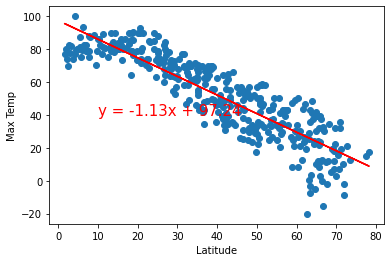

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))


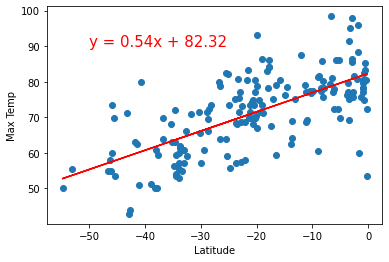

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

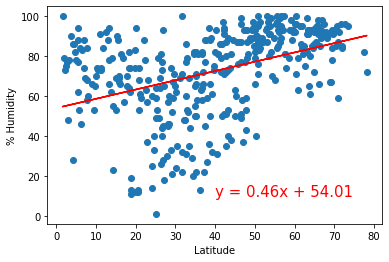

In [77]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

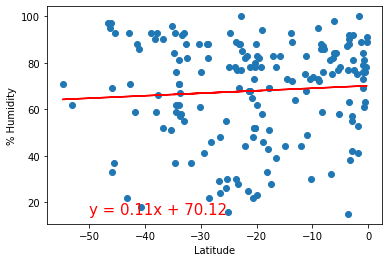

In [78]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

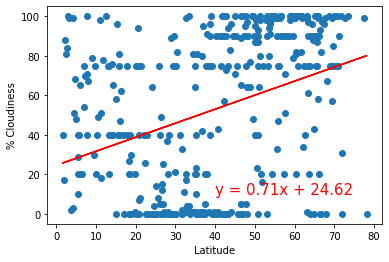

In [79]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for %Cloudiness', '% Cloudiness',(40,10))

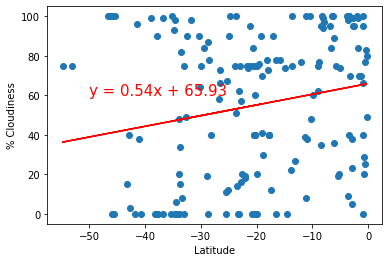

In [80]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

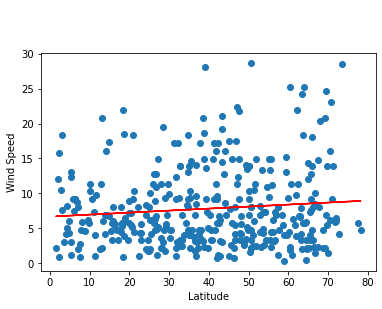

In [82]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

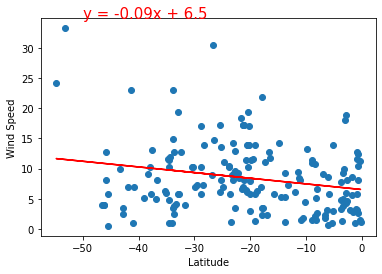

In [83]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))